# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Amazon Sales Dataset](https://www.kaggle.com/datasets/aliiihussain/amazon-sales-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.


## Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

/kaggle/input/amazon-sales-dataset/amazon_sales_dataset.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('amazon_sales_dataset.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


## last Five row

In [4]:
df.tail()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16
49999,50000,2023-06-29,2944,Home & Kitchen,253.44,30,1,Europe,Debit Card,2.1,464,177.41,177.41


## Shape of our dataset

In [5]:
df.shape

(50000, 13)

## List out all columns

In [6]:
df.columns

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


## Check Null Value

In [9]:
df.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

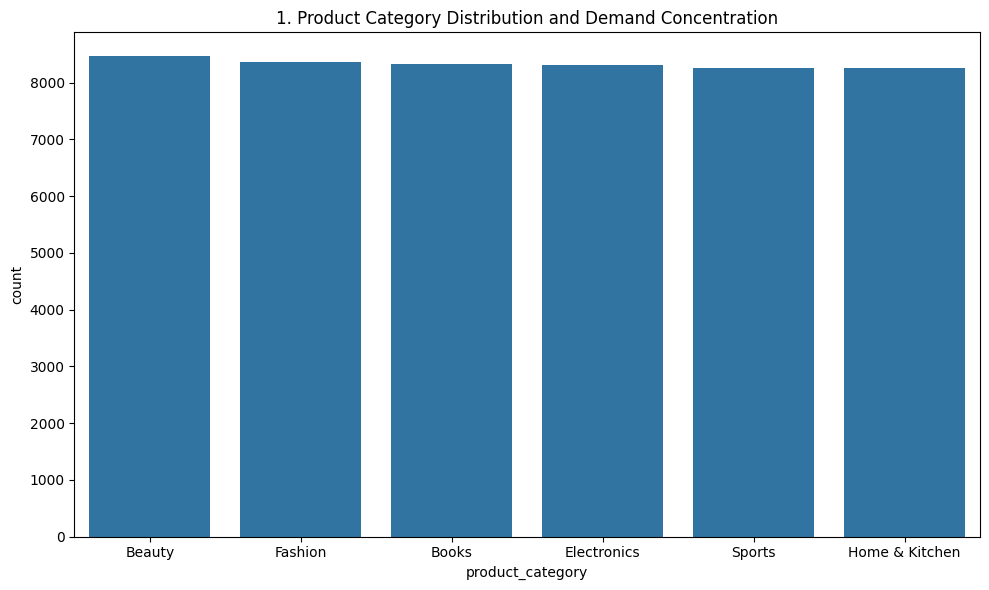

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index)
plt.title(f'{plot_no}. Product Category Distribution and Demand Concentration')
show_fig()
plot_no += 1


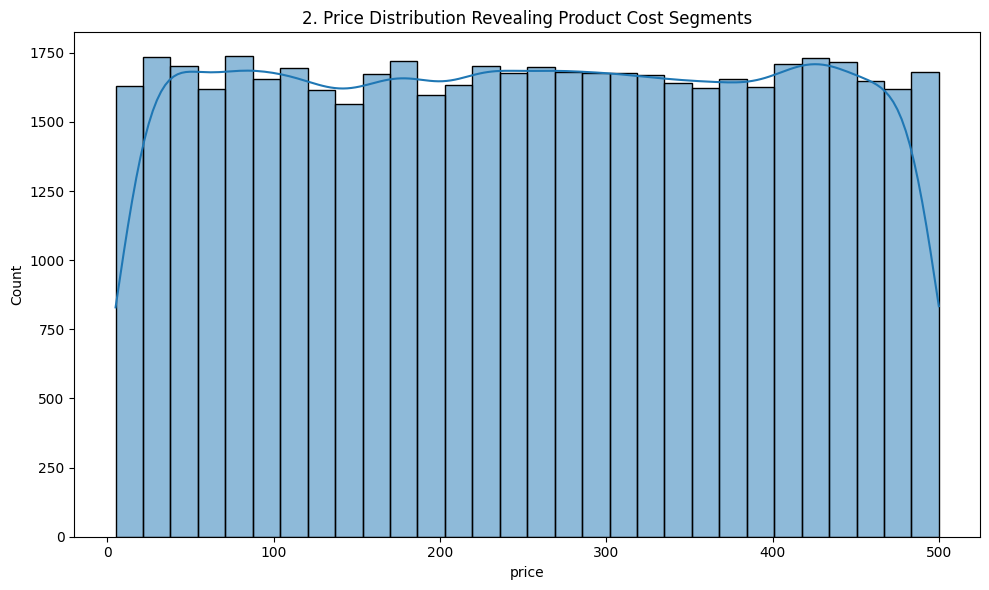

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title(f'{plot_no}. Price Distribution Revealing Product Cost Segments')
show_fig()
plot_no += 1


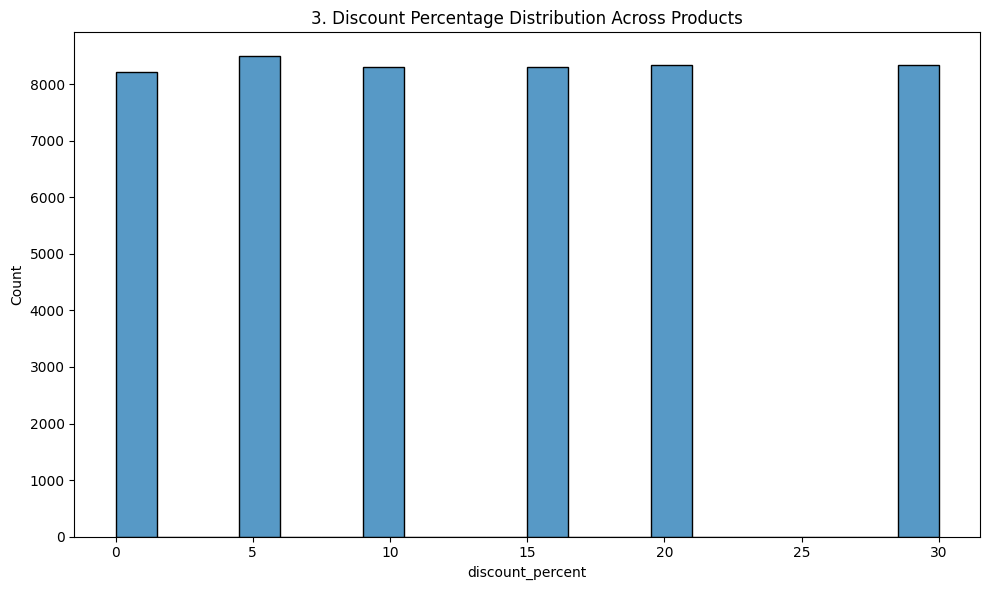

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['discount_percent'], bins=20)
plt.title(f'{plot_no}. Discount Percentage Distribution Across Products')
show_fig()
plot_no += 1


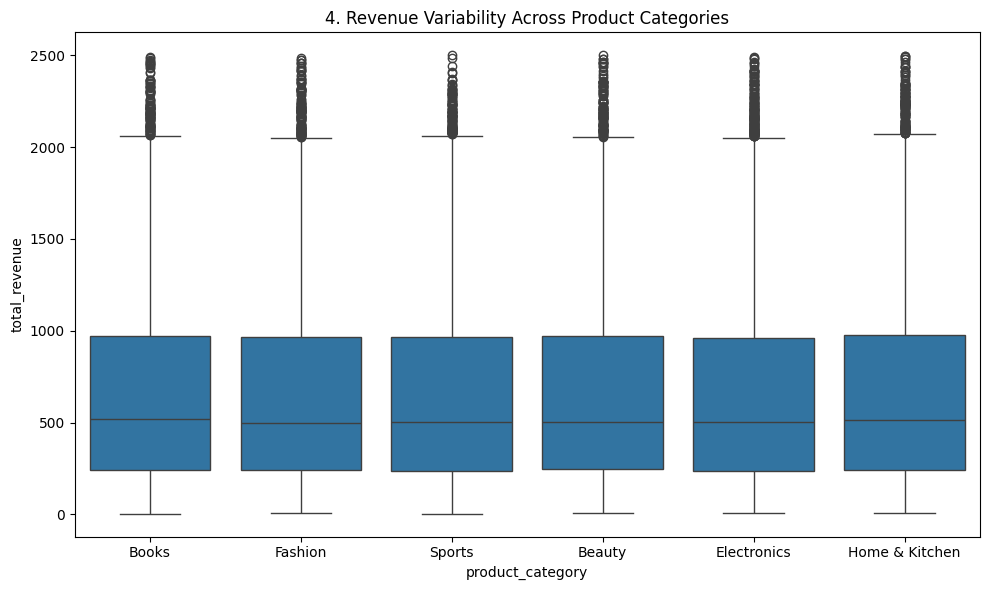

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='product_category', y='total_revenue')
plt.title(f'{plot_no}. Revenue Variability Across Product Categories')
show_fig()
plot_no += 1


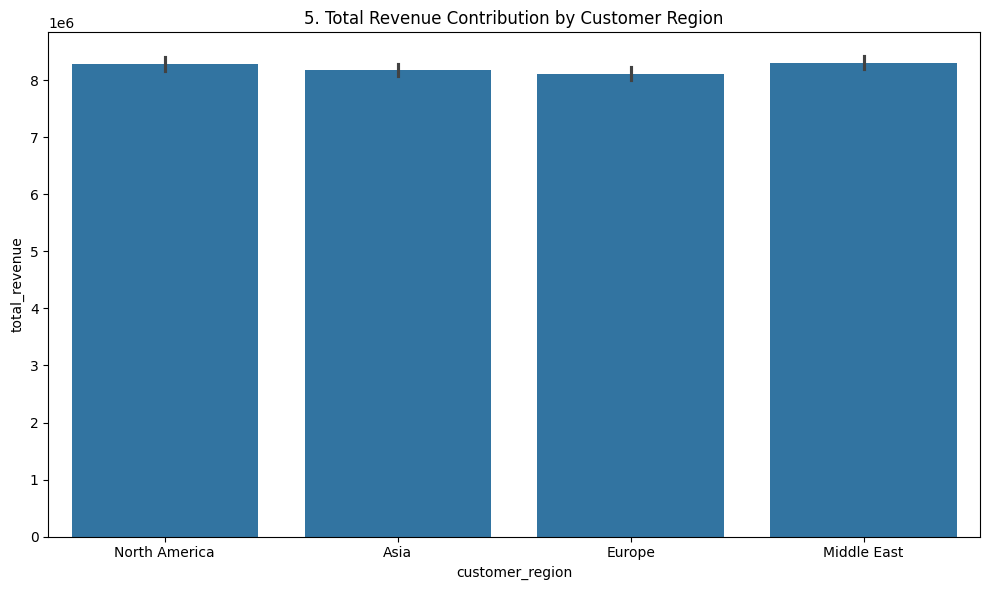

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='customer_region', y='total_revenue', estimator=sum)
plt.title(f'{plot_no}. Total Revenue Contribution by Customer Region')
show_fig()
plot_no += 1


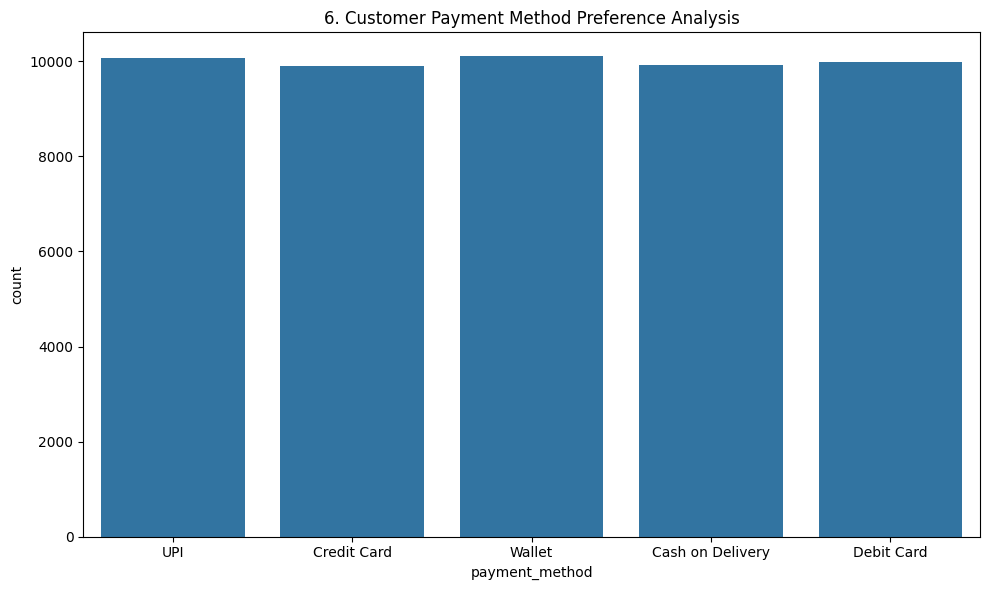

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='payment_method')
plt.title(f'{plot_no}. Customer Payment Method Preference Analysis')
show_fig()
plot_no += 1


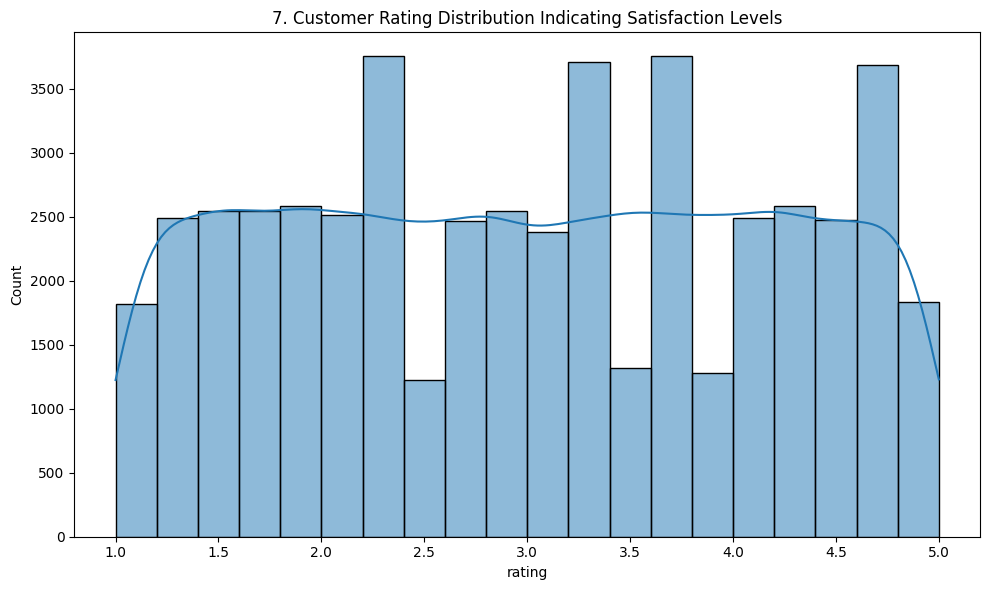

In [19]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title(f'{plot_no}. Customer Rating Distribution Indicating Satisfaction Levels')
show_fig()
plot_no += 1


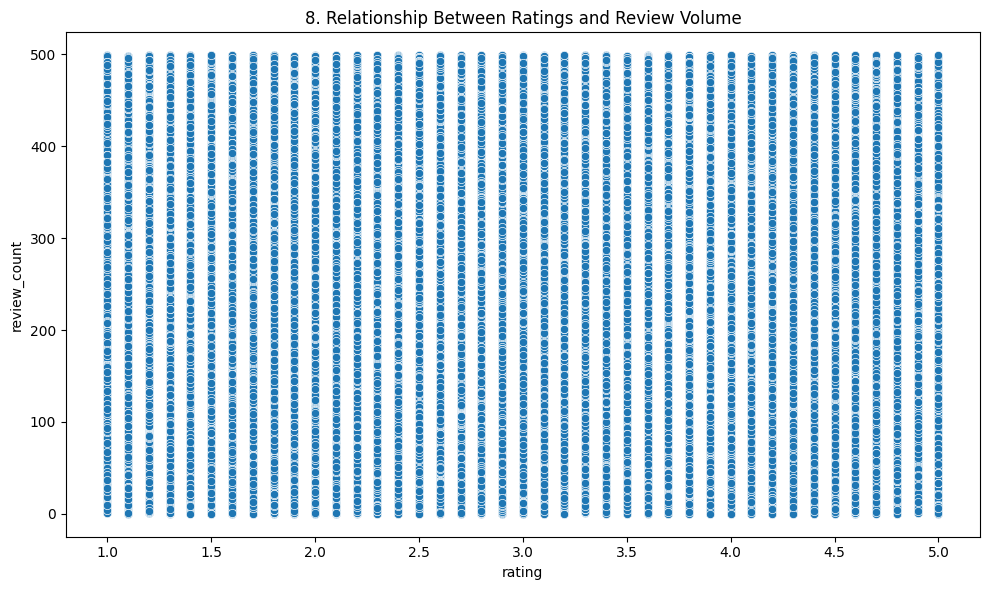

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating', y='review_count')
plt.title(f'{plot_no}. Relationship Between Ratings and Review Volume')
show_fig()
plot_no += 1


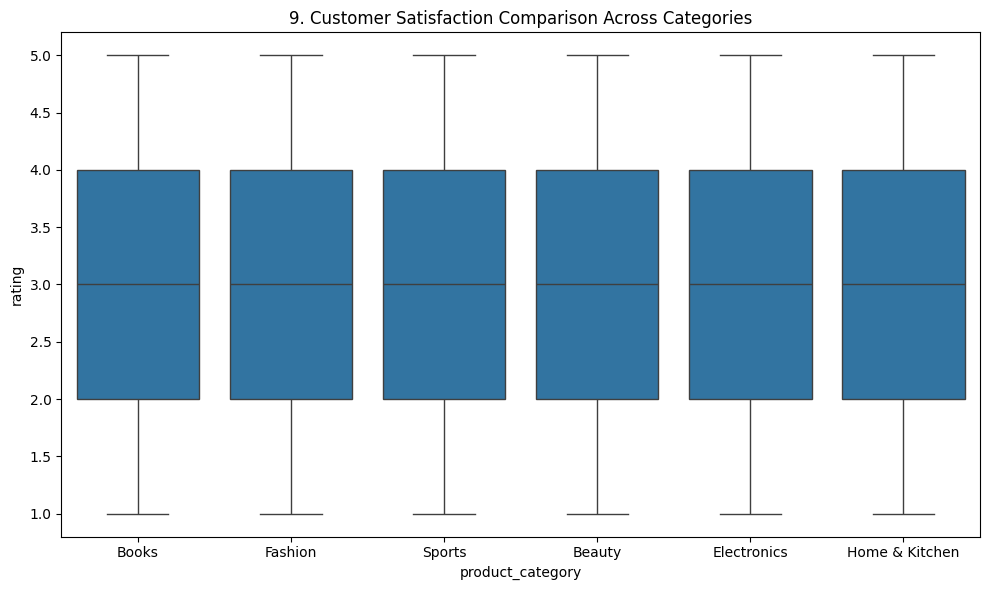

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='product_category', y='rating')
plt.title(f'{plot_no}. Customer Satisfaction Comparison Across Categories')
show_fig()
plot_no += 1


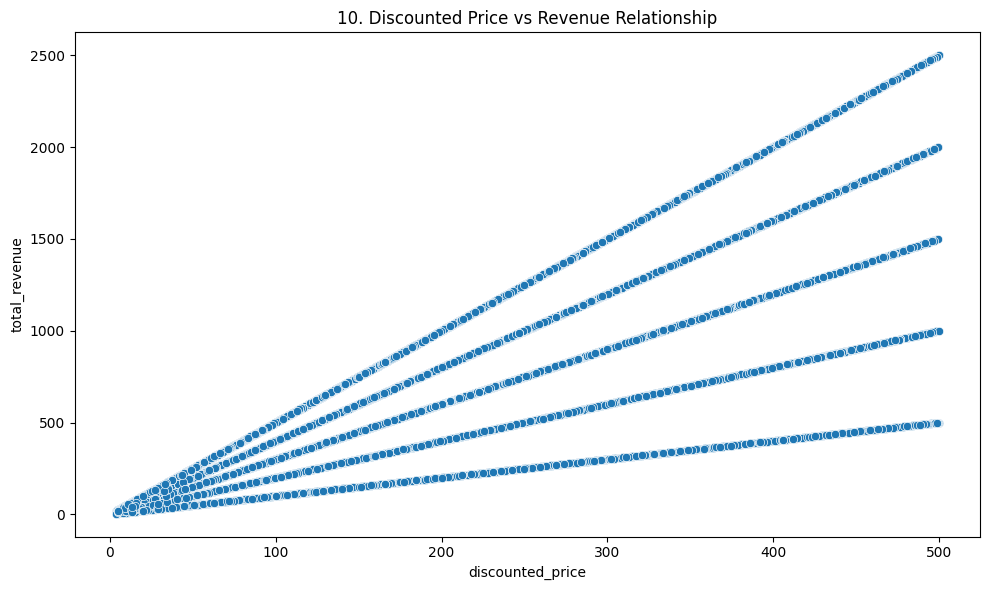

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='discounted_price', y='total_revenue')
plt.title(f'{plot_no}. Discounted Price vs Revenue Relationship')
show_fig()
plot_no += 1


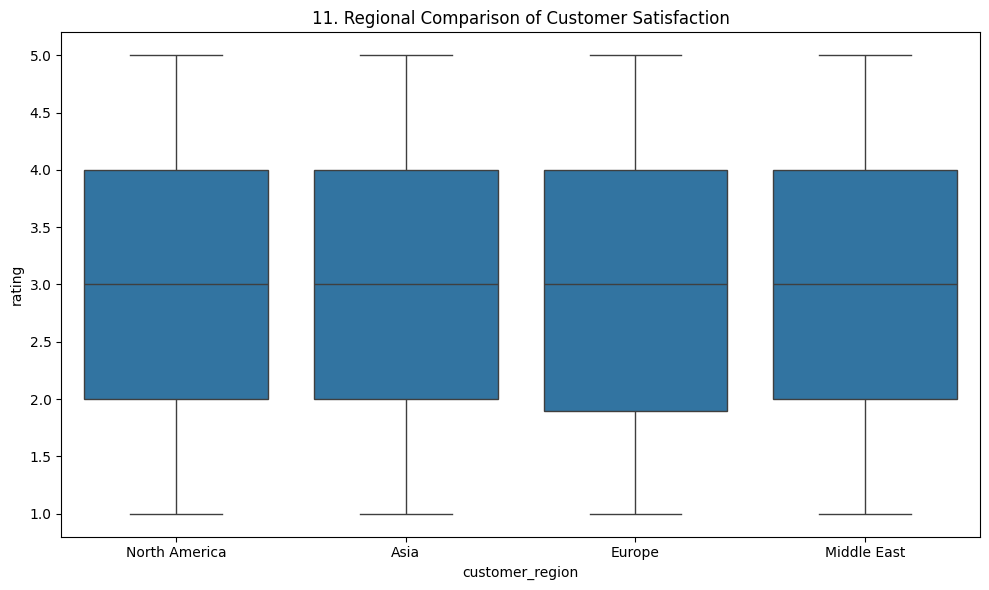

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='customer_region', y='rating')
plt.title(f'{plot_no}. Regional Comparison of Customer Satisfaction')
show_fig()
plot_no += 1


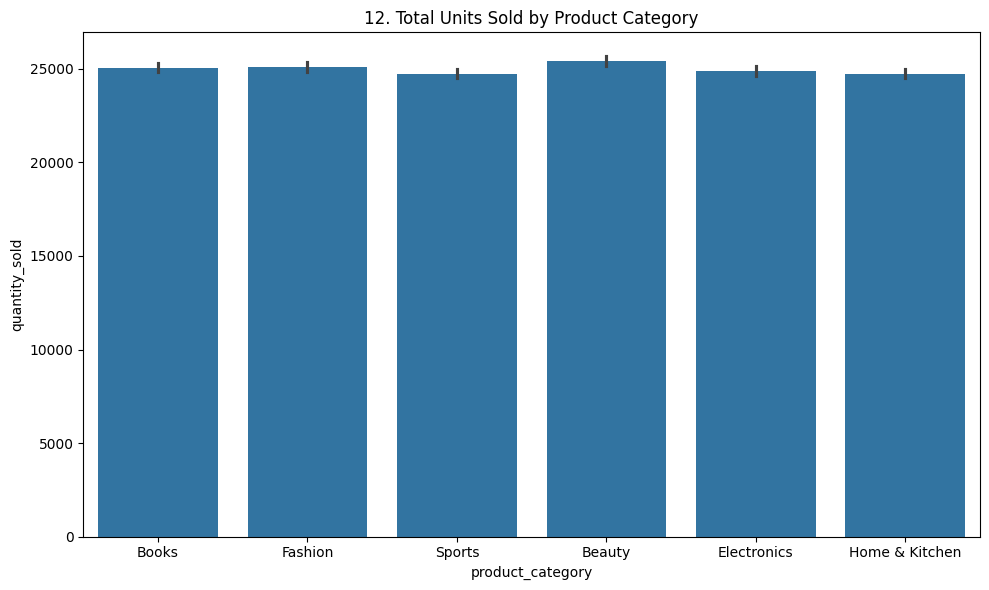

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='product_category', y='quantity_sold', estimator=sum)
plt.title(f'{plot_no}. Total Units Sold by Product Category')
show_fig()
plot_no += 1


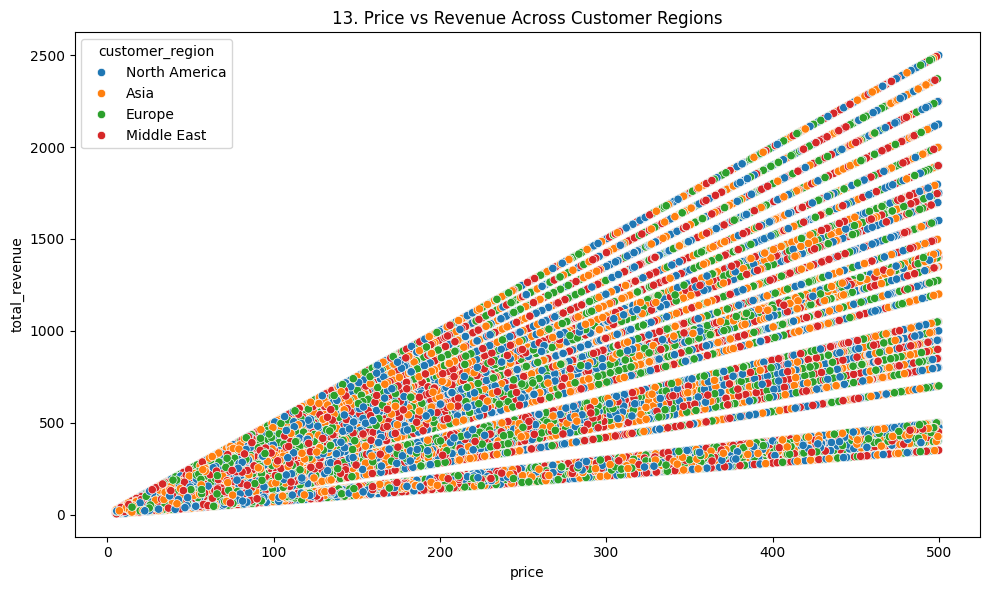

In [25]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='total_revenue', hue='customer_region')
plt.title(f'{plot_no}. Price vs Revenue Across Customer Regions')
show_fig()
plot_no += 1


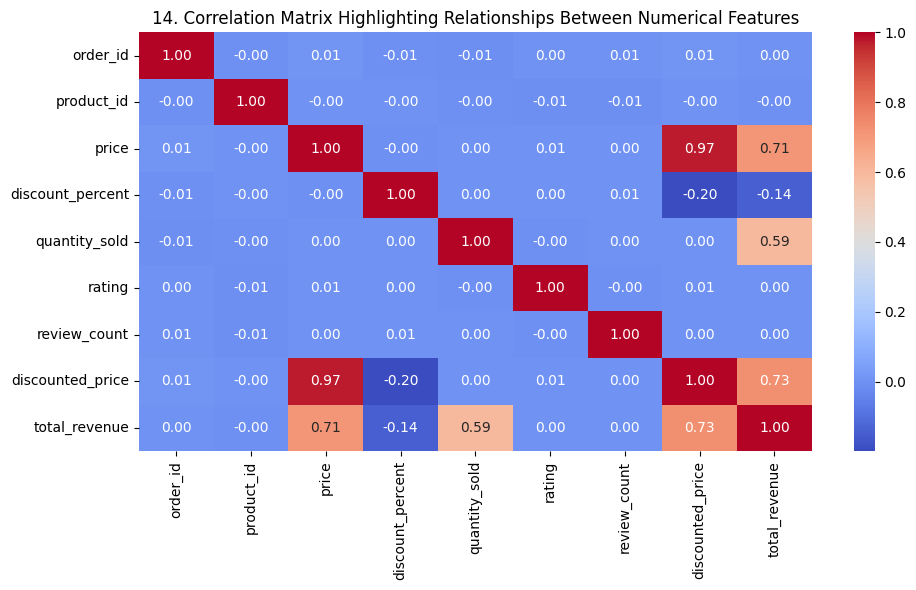

In [26]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Matrix Highlighting Relationships Between Numerical Features')
show_fig()
plot_no += 1


# Model Training

## Select features and target

In [27]:
X = df[['price', 'discount_percent', 'quantity_sold', 'rating', 'review_count']]
y = df['total_revenue']

## Split data into train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Scale features (helps stability)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train advanced supervised model

In [30]:
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

## Generate predictions

In [31]:
y_pred = model.predict(X_test_scaled)

## Print accuracy score

In [32]:
accuracy = r2_score(y_test, y_pred)*100
print("Model Accuracy (R² Score):", accuracy)

Model Accuracy (R² Score): 99.9118051508767


## Plot Actual vs Predicted

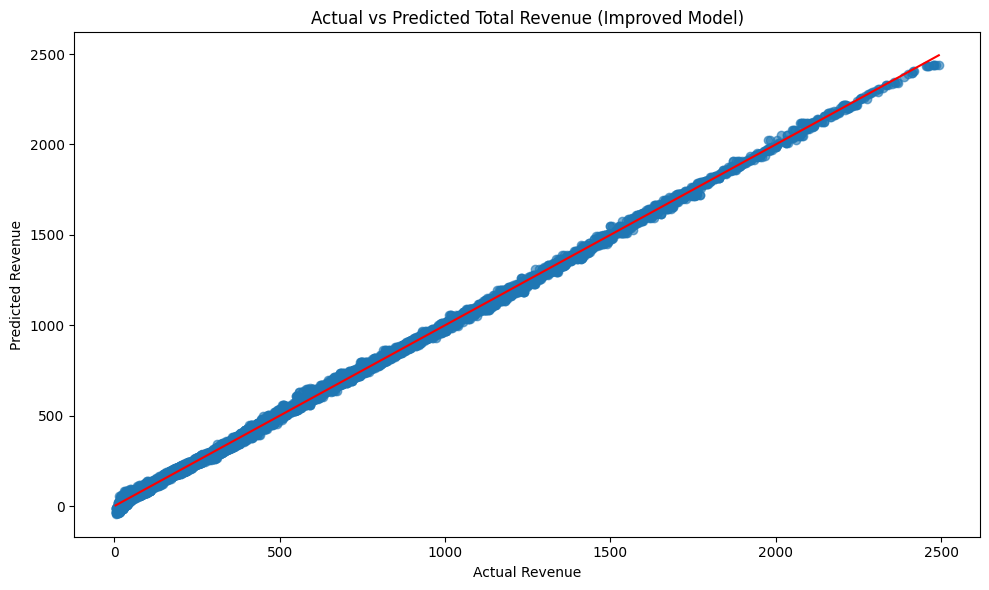

In [33]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()], 
    color = 'r'
)
plt.title("Actual vs Predicted Total Revenue (Improved Model)")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.tight_layout()
plt.show()